In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [51]:
data= pd.read_csv('Documents/ANZ synthesised transaction dataset pro.csv')
data= reduce_mem_usage(data)
print(data.shape)

Memory usage of dataframe is 1.47 MB --> 1.30 MB (Decreased by 11.7%)
(12043, 16)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 16 columns):
status               12043 non-null object
account              12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
first_name           12043 non-null object
balance              12043 non-null float32
age                  12043 non-null int8
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float32
transaction_id       12043 non-null object
customer_id          12043 non-null object
merchant_long_lat    7717 non-null object
movement             12043 non-null object
dtypes: float32(2), int8(1), object(13)
memory usage: 1.3+ MB


In [53]:
data.head()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,1956.579956,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.569946,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
1,authorized,ACC-2528867619,138.58 -34.96,SALES-POS,ea247b5c-61ee-4106-988f-84c3036ce5e0,Abigail,1913.920044,40,South Nowra,NSW,2018-08-08T04:38:14.000+0000,42.660000,a916b60869c94bc69e95e212d4581718,CUS-2505971401,150.6 -34.92,debit
2,authorized,ACC-2528867619,138.58 -34.96,SALES-POS,8927cdaf-73bc-49c2-ad75-0ebfbe983053,Abigail,1895.239990,40,Yass,NSW,2018-08-08T08:49:24.000+0000,18.680000,34ccea941f844b94be7aa894a14e6e8c,CUS-2505971401,148.91 -34.84,debit
3,authorized,ACC-2528867619,138.58 -34.96,POS,d47efc0a-2443-47d0-ad6b-4379779d2e3e,Abigail,1850.219971,40,Albany,WA,2018-08-08T17:29:40.000+0000,45.020000,62439234cc7748d787db7678cd886c70,CUS-2505971401,117.89 -35.03,debit
4,authorized,ACC-2528867619,138.58 -34.96,POS,21960650-c56e-4411-bc06-56e9964daf8e,Abigail,1830.260010,40,Allenby Gardens,SA,2018-08-08T21:40:26.000+0000,19.959999,a6b80b62044441dca4ad8c94a108cfe6,CUS-2505971401,138.56 -34.89,debit


In [54]:
data.tail()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
12038,posted,ACC-3689607373,115.79 -31.79,INTER BANK,NaN,Virginia,8983.860352,20,NaN,NaN,2018-10-26T19:00:00.000+0000,55.000000,b858b953f9af4e52b88949172868ec44,CUS-127297539,NaN,debit
12039,posted,ACC-3689607373,115.79 -31.79,PAYMENT,NaN,Virginia,8914.860352,20,NaN,NaN,2018-10-26T21:00:00.000+0000,69.000000,98a1fb9cb9b14d60a5da52a44496ece7,CUS-127297539,NaN,debit
12040,authorized,ACC-3689607373,115.79 -31.79,POS,feff3519-afd1-4bf9-84f8-7add57b84d0d,Virginia,8889.230469,20,Perth,WA,2018-10-27T08:25:28.000+0000,25.629999,42246360f65e4b719455f5b0e21366aa,CUS-127297539,115.86 -31.95,debit
12041,authorized,ACC-3689607373,115.79 -31.79,POS,948749e3-471e-4a8f-92ad-73e934b95ec4,Virginia,8872.019531,20,Sydney,NSW,2018-10-28T11:30:40.000+0000,17.209999,c0f7b8f746df43ebb91406b9f508be0a,CUS-127297539,151.21 -33.87,debit
12042,authorized,ACC-3689607373,115.79 -31.79,POS,3e2442b6-9e5c-4c09-9782-a7139d4bfe49,Virginia,8857.230469,20,Belmont,WA,2018-10-29T13:08:38.000+0000,14.790000,002ceb9e43e1409d9a800f61f179c808,CUS-127297539,115.93 -31.96,debit


In [55]:
for i in ['account','customer_id','first_name']:
    print(f'unique [{i}] count:', data[i].nunique())

unique [account] count: 100
unique [customer_id] count: 100
unique [first_name] count: 80


In [56]:
total_transaction= data['amount'].sum()
print(total_transaction)

2263284.0


In [57]:
data.groupby('transaction_id') ['movement'].first().value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [58]:
data.groupby('transaction_id')['first_name'].first().value_counts().head()

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

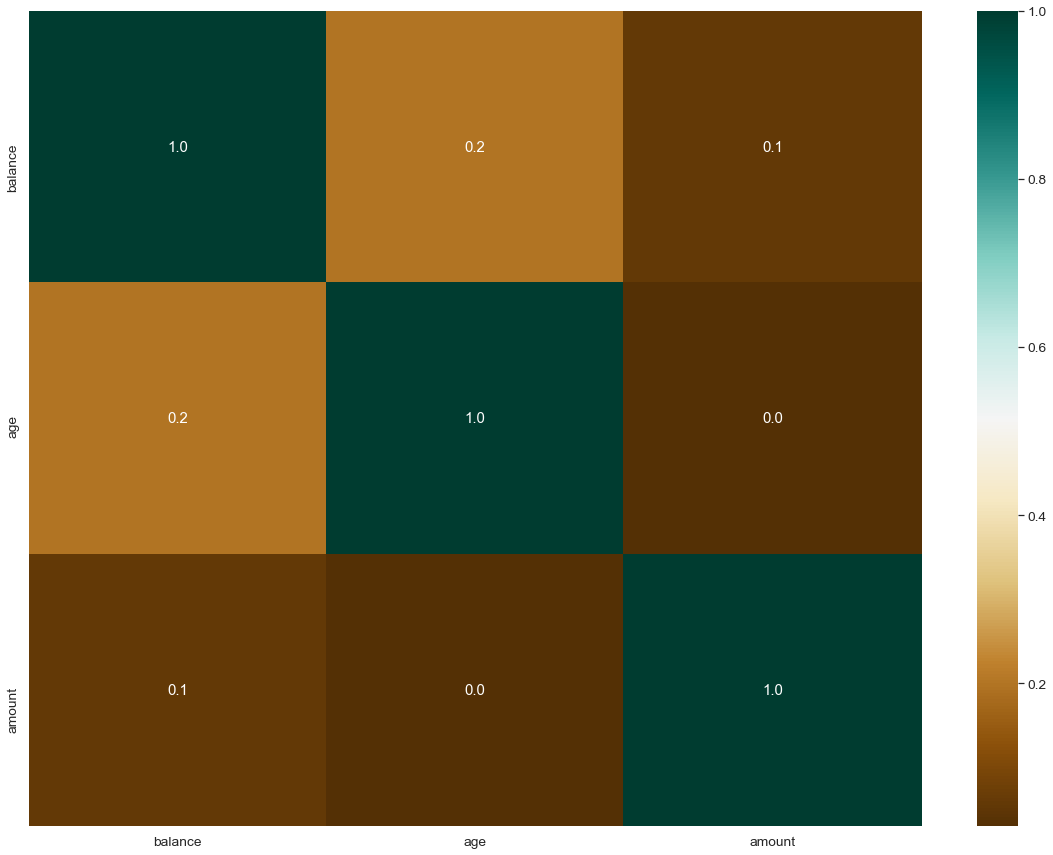

In [59]:
corr = data.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [70]:
data.set_index("txn_description").head(10)


,status,account,long_lat,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
txn_description,,,,,,,,,,,,,,,
PAY/SALARY,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1956.579956,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.569946,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
SALES-POS,authorized,ACC-2528867619,138.58 -34.96,ea247b5c-61ee-4106-988f-84c3036ce5e0,Abigail,1913.920044,40,South Nowra,NSW,2018-08-08T04:38:14.000+0000,42.660000,a916b60869c94bc69e95e212d4581718,CUS-2505971401,150.6 -34.92,debit
SALES-POS,authorized,ACC-2528867619,138.58 -34.96,8927cdaf-73bc-49c2-ad75-0ebfbe983053,Abigail,1895.239990,40,Yass,NSW,2018-08-08T08:49:24.000+0000,18.680000,34ccea941f844b94be7aa894a14e6e8c,CUS-2505971401,148.91 -34.84,debit
POS,authorized,ACC-2528867619,138.58 -34.96,d47efc0a-2443-47d0-ad6b-4379779d2e3e,Abigail,1850.219971,40,Albany,WA,2018-08-08T17:29:40.000+0000,45.020000,62439234cc7748d787db7678cd886c70,CUS-2505971401,117.89 -35.03,debit
POS,authorized,ACC-2528867619,138.58 -34.96,21960650-c56e-4411-bc06-56e9964daf8e,Abigail,1830.260010,40,Allenby Gardens,SA,2018-08-08T21:40:26.000+0000,19.959999,a6b80b62044441dca4ad8c94a108cfe6,CUS-2505971401,138.56 -34.89,debit
INTER BANK,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1754.260010,40,NaN,NaN,2018-08-09T03:00:00.000+0000,76.000000,947184c7f3eb47c8895a6b78c4e68358,CUS-2505971401,NaN,debit
POS,authorized,ACC-2528867619,138.58 -34.96,b327cceb-f5ec-40d2-be18-d7315f2b8f54,Abigail,1735.380005,40,Salisbury,SA,2018-08-09T15:31:35.000+0000,18.879999,7d53d44b6b5045efb24dc2eb3584f554,CUS-2505971401,138.64 -34.76,debit
POS,authorized,ACC-2528867619,138.58 -34.96,2a1bebdc-3f02-4cce-a261-81a8010a93fc,Abigail,1699.680054,40,Modbury,SA,2018-08-09T17:30:46.000+0000,35.700001,2966394a3e684adf95f9d205077200d5,CUS-2505971401,138.69 -34.83,debit
PAYMENT,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1619.680054,40,NaN,NaN,2018-08-10T10:00:00.000+0000,80.000000,32227bc9ed8e4f9ab8f0e4244976dd31,CUS-2505971401,NaN,debit


In [68]:
data_salary=data[data["txn_description"].isin(["PAY/SALARY"])]

In [106]:
monthly_income=(data_salary.groupby('first_name')['amount'].sum()/3).sort_values(ascending=False)

In [107]:
print(monthly_income)

first_name
Michael        35469.808594
Kenneth        21306.326172
Jessica        14490.839844
Linda          14299.933594
Ryan           12467.823242
Susan          12311.483398
Richard        12120.786133
Tim            11781.307617
Ricky          11214.709961
Kimberly       10736.333008
Tyler          10642.573242
Christopher    10054.360352
Joseph          9979.073242
Natasha         9837.426758
Charles         9641.870117
Michelle        9280.739258
Isaiah          9109.216797
Billy           8833.487305
Eric            8690.592773
Christine       8505.849609
Abigail         8435.136719
Lucas           8350.182617
Sandra          8207.756836
Craig           8109.540527
Daniel          7767.130371
Marissa         7590.239746
Brian           7539.606934
Robert          7508.560059
Robin           7416.023438
Cindy           7353.880371
                   ...     
Derek           4765.366699
Diana           4730.459961
Rachael         4721.920410
Kaitlyn         4493.969727
Patrick  

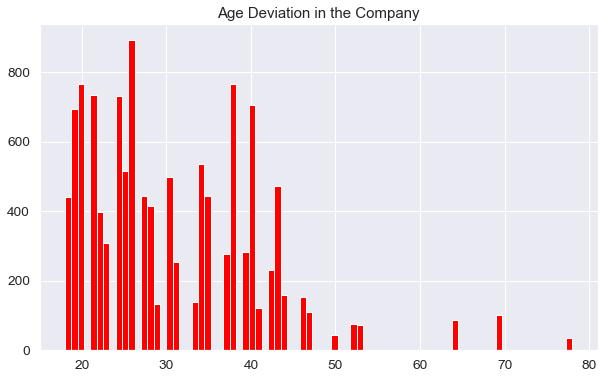

In [126]:
plt.figure(figsize=(10,6))
plt.title("Age Deviation in the Company")
std_age=plt.hist(data['age'], bins=80, color="red")

In [103]:
age_all=data.groupby('first_name')['age'].first()

In [104]:
print(age_all) 

first_name
Abigail        40
Alexander      38
Amy            43
Andrew         78
Antonio        26
Ashley         25
Barry          38
Billy          52
Brian          42
Catherine      26
Charles        18
Christine      39
Christopher    33
Cindy          19
Craig          28
Daniel         22
Darren         20
David          42
Debra          18
Derek          20
Diana          26
Donald         22
Dustin         28
Edward         19
Elizabeth      50
Emily          43
Eric           22
Fernando       19
Gregory        42
Heather        41
               ..
Matthew        39
Melissa        30
Michael        38
Michele        30
Michelle       19
Natasha        40
Nathaniel      31
Patrick        46
Paul           25
Rachael        21
Renee          38
Rhonda         40
Richard        24
Ricky          43
Robert         20
Robin          34
Ronald         25
Ruth           47
Ryan           31
Sandra         34
Sarah          46
Scott          23
Stephanie      53
Susan          20

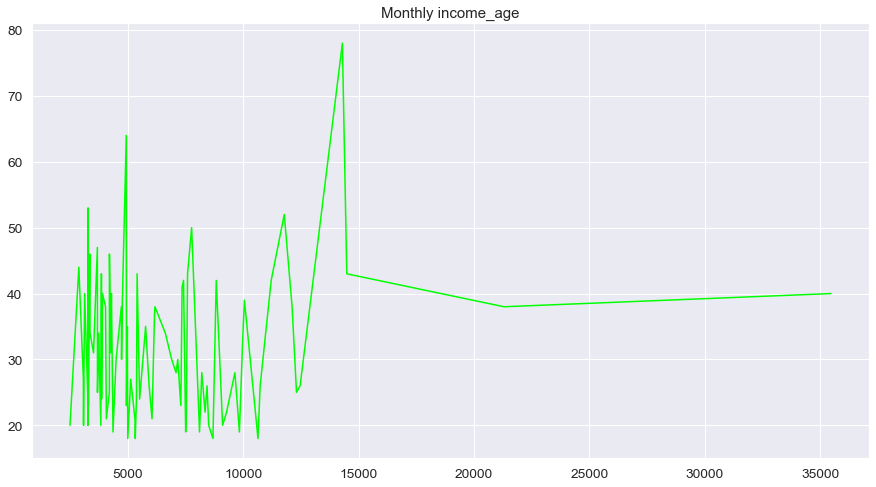

In [108]:
x=monthly_income
y=age_all
plt.figure(figsize=(15,8))
plt.title("Monthly income_age")
plt.plot(x,y,color="lime")

In [109]:
Annual_salary=monthly_income*12

In [110]:
print(Annual_salary)

first_name
Michael        425637.687500
Kenneth        255675.906250
Jessica        173890.078125
Linda          171599.203125
Ryan           149613.875000
Susan          147737.796875
Richard        145449.437500
Tim            141375.687500
Ricky          134576.515625
Kimberly       128836.000000
Tyler          127710.875000
Christopher    120652.328125
Joseph         119748.875000
Natasha        118049.125000
Charles        115702.437500
Michelle       111368.875000
Isaiah         109310.601562
Billy          106001.843750
Eric           104287.109375
Christine      102070.195312
Abigail        101221.640625
Lucas          100202.187500
Sandra          98493.078125
Craig           97314.484375
Daniel          93205.562500
Marissa         91082.875000
Brian           90475.281250
Robert          90102.718750
Robin           88992.281250
Cindy           88246.562500
                   ...      
Derek           57184.398438
Diana           56765.519531
Rachael         56663.046875
Kai

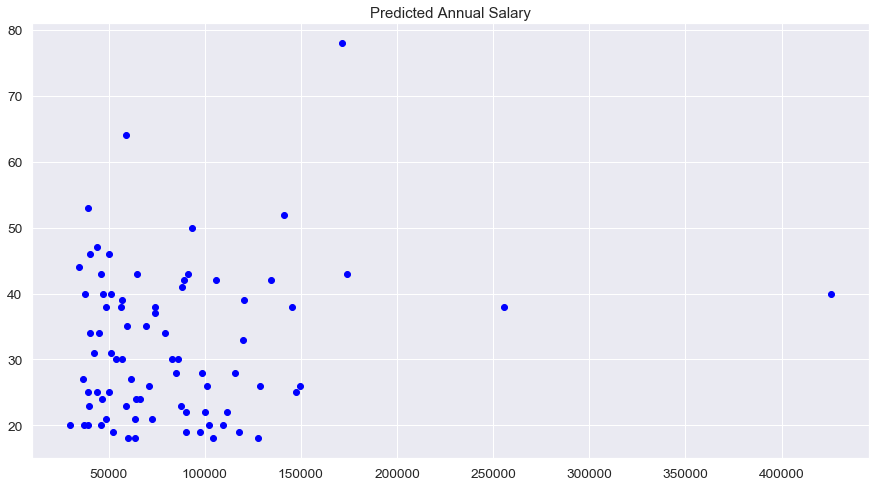

In [119]:
x=Annual_salary
y=age_all
plt.figure(figsize=(15,8))
plt.title("Predicted Annual Salary")
plt.scatter(x,y,color="blue")

In [128]:
print('Here we have cleaned the dataset, explored it through simple Exploratory Data Analysis and have done some Feature Engineering to conclude with the expected Annual Salary of the customers. I have successfully anlysed the monthly incomes and caculated the predicted annual income. I have also found out the corelation between age and salary of the customers, the maximum salary a person gets and the transaction details. Came to a conclusion, that there is no such correlation between age and salary of a customer. Finally every visualisations are plotted and explained for further analysis.Thank you very much.')

Here we have cleaned the dataset, explored it through simple Exploratory Data Analysis and have done some Feature Engineering to conclude with the expected Annual Salary of the customers. I have successfully anlysed the monthly incomes and caculated the predicted annual income. I have also found out the corelation between age and salary of the customers, the maximum salary a person gets and the transaction details. Came to a conclusion, that there is no such correlation between age and salary of a customer. Finally every visualisations are plotted and explained for further analysis.Thank you very much.
